# GLM C01 - Count data - Doctor visits - `brms`

## Josep Fortiana $\mskip100mu$ 2021-05-13

***
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

From [Cameron, A. C. & Trivedi, P. K. (2013) - _Regression Analysis of Count data, 2nd  edition,_ Chapter 3.](http://faculty.econ.ucdavis.edu/faculty/cameron/racd2/RACD2programs.html)

## Doctor visits data

Consider the following example of the number of doctor visits in the past two weeks for a single-adult sample of size $5190$    
from the Australian Health Survey 1977–78.    

This and several other measures of health service utilization such as days in hospital and number of medicines taken   
were analyzed in (${}^{\star}$) in the light of an economic model of joint determination of health service utilization and health insurance choice.

(${}^{\star}$) Cameron, Trivedi, Milne, and Piggott (1988) _A Microeconometric Model of the Demand for Health Care and Health
Insurance in Australia,_ The Review of Economic Studies, Volume 55, Issue 1 (Jan., 1988), 85-106. 

### Variables

01. `Sex`:             Equals 1 If Female  
02. `Age`:             Age In Years Divided By 100               
03. `Agesq`:           Age Squared    
04. `Income`:          Annual Income In Tens Of Thousands Of Dollars
05. `Levyplus`:        Equals 1 If Private Health Insurance
06. `Freepoor`:        Equals 1 If Free Government Health Insurance Due To Low Income
07. `Freerepa`:        Equals 1 If Free Government Health Insurance Due To Old Age, Disability, Or Veteran Status
08. `Illness`:         Number Of Illnesses In Past Two Weeks        
09. `Actdays`:         Number Of Days Of Reduced Activity In Past Two Weeks Due To Illness Or Injury
10. `Hscore`:          General Health Questionnaire Score Using Goldberg's Method
11. `Chcond1`:         Equals 1 If Chronic Condition Not Limiting Activity 
12. `Chcond2`:         Equals1 If Chronic Condition Limiting Activity  
13. `Dvisits`:         Number Of Doctor Visits In Past Two Weeks    

The actual dataset contains 7 more variables not used in the present study

In [1]:
Docvis<-read.csv("Doctor.visits.csv")
str(Docvis)

'data.frame':	5190 obs. of  20 variables:
 $ Sex     : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Age     : num  0.19 0.19 0.19 0.19 0.19 ...
 $ Agesq   : num  0.0361 0.0361 0.0361 0.0361 0.0361 ...
 $ Income  : num  0.55 0.45 0.9 0.15 0.45 ...
 $ Levyplus: int  1 1 0 0 0 0 0 0 1 1 ...
 $ Freepoor: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Freerepa: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Illness : int  1 1 3 1 2 5 4 3 2 1 ...
 $ Actdays : int  4 2 0 0 5 1 0 0 0 0 ...
 $ Hscore  : int  1 1 0 0 1 9 2 6 5 0 ...
 $ Chcond1 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ Chcond2 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dvisits : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Nondocco: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hospadmi: int  0 0 1 0 0 0 0 0 0 0 ...
 $ Hospdays: int  0 0 4 0 0 0 0 0 0 0 ...
 $ Medicine: int  1 2 2 0 3 1 0 1 1 1 ...
 $ Prescrib: int  1 1 1 0 1 1 0 1 0 1 ...
 $ Nonpresc: int  0 1 1 0 2 0 0 0 1 0 ...
 $ Constant: int  1 1 1 1 1 1 1 1 1 1 ...


In [2]:
# Variables 14-20 are not used in this study
Docvis<-Docvis[,1:13]
str(Docvis)

'data.frame':	5190 obs. of  13 variables:
 $ Sex     : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Age     : num  0.19 0.19 0.19 0.19 0.19 ...
 $ Agesq   : num  0.0361 0.0361 0.0361 0.0361 0.0361 ...
 $ Income  : num  0.55 0.45 0.9 0.15 0.45 ...
 $ Levyplus: int  1 1 0 0 0 0 0 0 1 1 ...
 $ Freepoor: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Freerepa: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Illness : int  1 1 3 1 2 5 4 3 2 1 ...
 $ Actdays : int  4 2 0 0 5 1 0 0 0 0 ...
 $ Hscore  : int  1 1 0 0 1 9 2 6 5 0 ...
 $ Chcond1 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ Chcond2 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dvisits : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
Dvisits<-Docvis$Dvisits
str(Dvisits)
summary(Dvisits)

 int [1:5190] 1 1 1 1 1 1 1 1 1 1 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3017  0.0000  9.0000 

In [4]:
Tvisits<-tabulate(Dvisits+1)
sum(Tvisits)
fvisits<-Tvisits/sum(Tvisits)
Tf<-rbind(Count=0:9,Freq=Tvisits,"Rel.freq. f"=round(fvisits,3))
Tf

[1] 5190

Count,0.000,1.000,2.000,3e+00,4.000,5.000,6.000,7.000,8.000,9
Freq,4141.000,782.000,174.000,3e+01,24.000,9.000,12.000,12.000,5.000,1
Rel.freq. f,0.798,0.151,0.034,6e-03,0.005,0.002,0.002,0.002,0.001,0


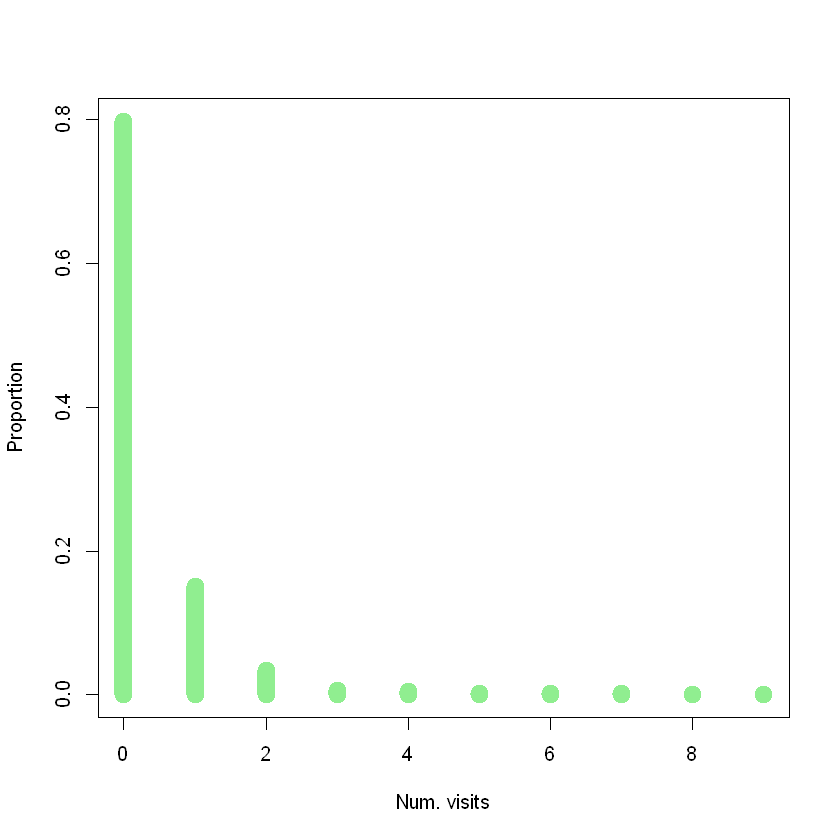

In [5]:
options(repr.plot.width=7,repr.plot.height=7)
matplot(x=0:9,y=fvisits,type="h",col="LightGreen",lwd=15,
       xlab="Num. visits", ylab="Proportion")

In [6]:
round(mean(Dvisits),3)
round(var(Dvisits),3)
round(var(Dvisits)/mean(Dvisits),3)

[1] 0.302

[1] 0.637

[1] 2.111

The variance is larger than the mean but not so large as to warrant an overdisperse classification.

The expectation and variance of  $Y\sim\negbindist(r,p)$ are:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p},\mskip50mu\operatorname{var}(Y)=\dfrac{r\cdot (1-p)}{p^{2}}.
$$



An alternative parameterization is to use $(\mu,\theta)$ instead of $(p,r)$ where $\mu=\operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p}$  and $\theta=r$.

With this parameterization:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\mu,\mskip50mu\operatorname{var}(Y)=\mu+\dfrac{\mu^{2}}{\theta}.
$$

A rough estimate of the $\theta$ parameter in a Negative Binomial is:

$$
    v\equiv\var(Y)=\mu+\dfrac{\mu^{2}}{\theta}=\mu\cdot\left(1+\dfrac{\mu}{\theta}\right),
    \mskip40mu \hat{\theta}=\dfrac{\mu}{v/\mu-1}.
$$

In this case:

In [7]:
theta.hat<-mean(Dvisits)/(var(Dvisits)/mean(Dvisits)-1)
round(theta.hat,3)

[1] 0.272

#### Predictors description

In [8]:
summary(Docvis[,1:12])

      Sex              Age             Agesq            Income      
 Min.   :0.0000   Min.   :0.1900   Min.   :0.0361   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.2200   1st Qu.:0.0484   1st Qu.:0.2500  
 Median :1.0000   Median :0.3200   Median :0.1024   Median :0.5500  
 Mean   :0.5206   Mean   :0.4064   Mean   :0.2071   Mean   :0.5832  
 3rd Qu.:1.0000   3rd Qu.:0.6200   3rd Qu.:0.3844   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :0.7200   Max.   :0.5184   Max.   :1.5000  
    Levyplus         Freepoor          Freerepa         Illness     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.000  
 Mean   :0.4428   Mean   :0.04277   Mean   :0.2102   Mean   :1.432  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :5.000  
    Actdays            Hscore     

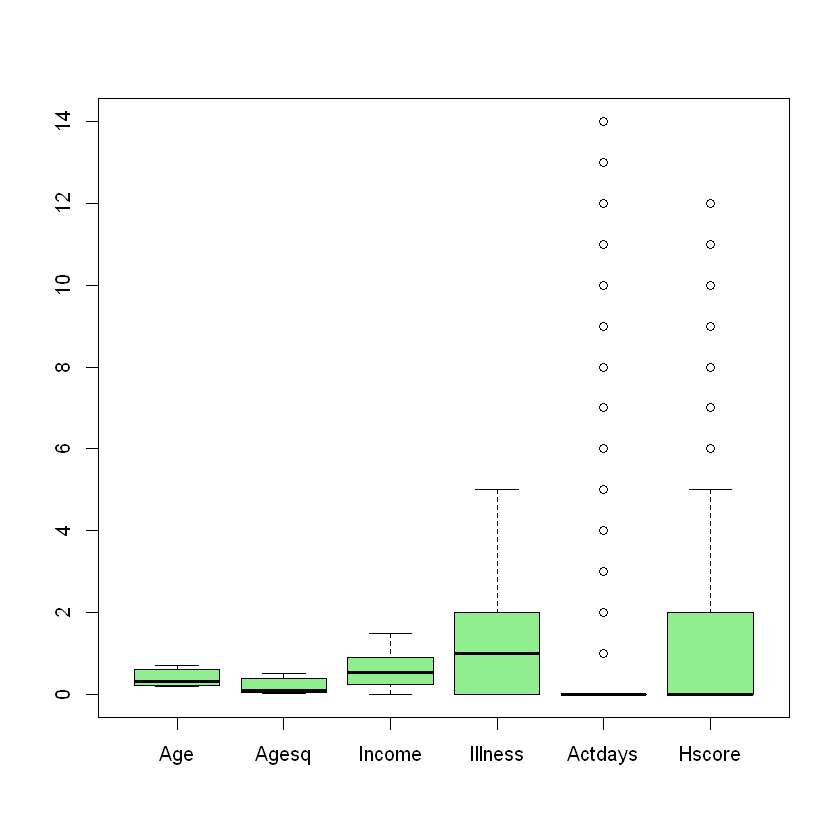

In [9]:
Num.vars<-c(2,3,4,8,9,10)
Bin.vars<-c(1,5,6,7,11,12)
options(repr.plot.width=7,repr.plot.height=7)
boxplot(Docvis[,Num.vars],col="LightGreen")

In [10]:
round(cor(Docvis[,Num.vars]),2)

,Age,Agesq,Income,Illness,Actdays,Hscore
Age,1.00,0.99,-0.27,0.20,0.09,0.02
Agesq,0.99,1.00,-0.32,0.21,0.09,0.02
Income,-0.27,-0.32,1.00,-0.15,-0.05,-0.09
Illness,0.20,0.21,-0.15,1.00,0.22,0.36
Actdays,0.09,0.09,-0.05,0.22,1.00,0.28
Hscore,0.02,0.02,-0.09,0.36,0.28,1.00


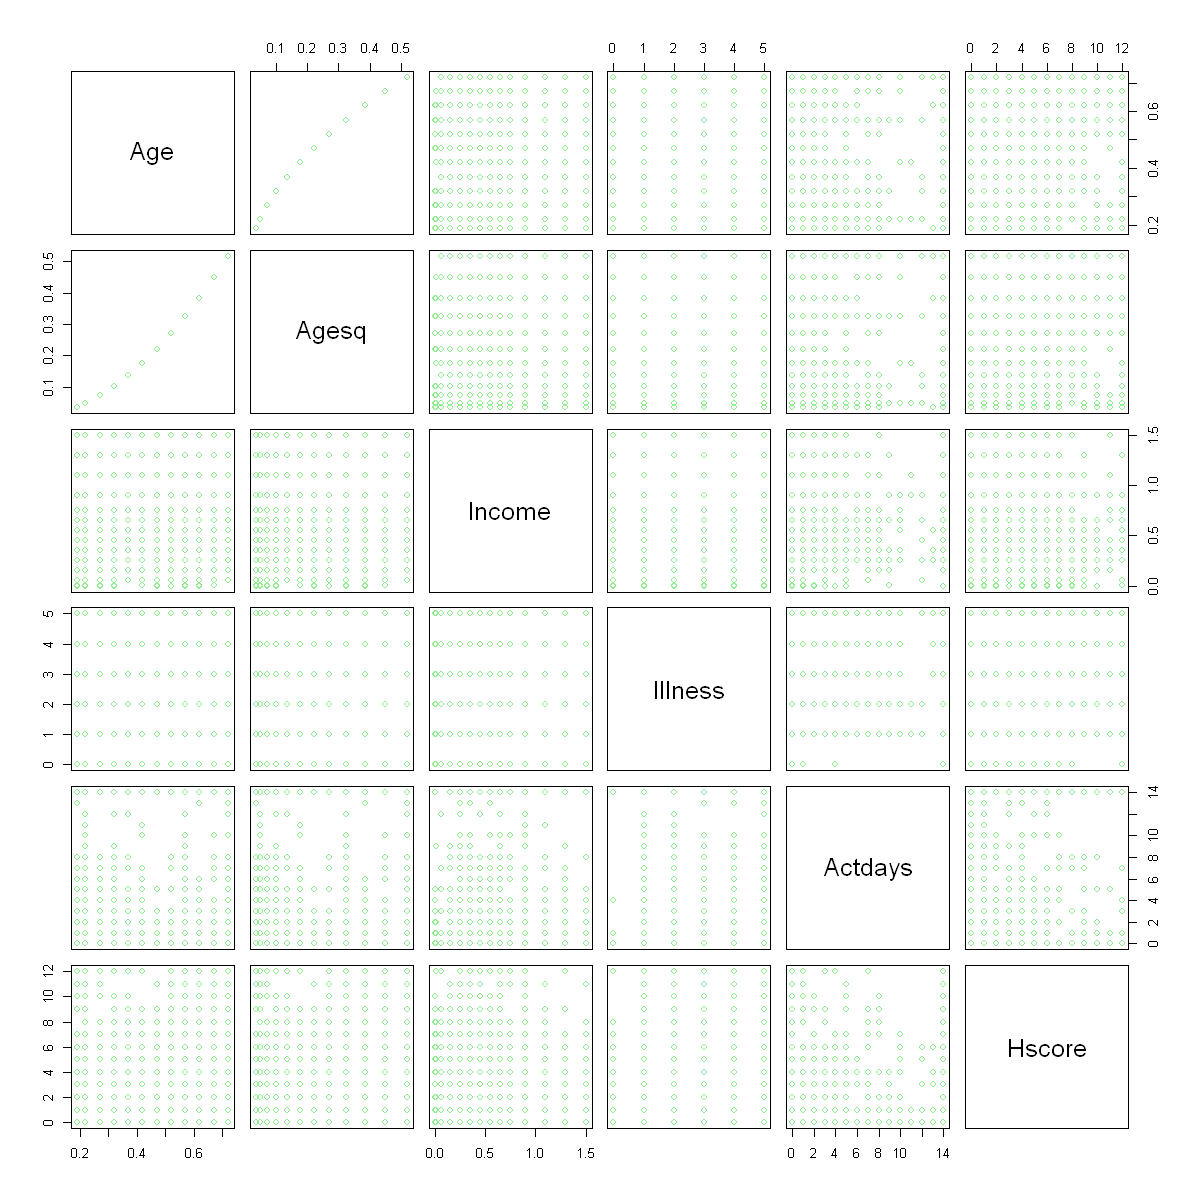

In [11]:
options(repr.plot.width=10,repr.plot.height=10)
pairs(Docvis[,Num.vars],col="LightGreen")

# 01 - Frequentist Poisson regression with `glm`

The default link function for the `poisson`  family is `log()`. That is, the model is

$$
    \log(\mu_{i})=\eta_{i},\mskip40mu \eta_{i}=\beta_{0}+x_{i}\cdot \beta,\mskip40mu 1\leq i\leq n.
$$

In [12]:
Docvis.Poisson.glm.01<-glm(Dvisits~.,family=poisson,data=Docvis)
summary(Docvis.Poisson.glm.01)


Call:
glm(formula = Dvisits ~ ., family = poisson, data = Docvis)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9170  -0.6862  -0.5743  -0.4839   5.7005  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.223848   0.189816 -11.716   <2e-16 ***
Sex          0.156882   0.056137   2.795   0.0052 ** 
Age          1.056299   1.000781   1.055   0.2912    
Agesq       -0.848704   1.077785  -0.787   0.4310    
Income      -0.205321   0.088379  -2.323   0.0202 *  
Levyplus     0.123185   0.071640   1.720   0.0855 .  
Freepoor    -0.440061   0.179811  -2.447   0.0144 *  
Freerepa     0.079798   0.092060   0.867   0.3860    
Illness      0.186948   0.018281  10.227   <2e-16 ***
Actdays      0.126846   0.005034  25.198   <2e-16 ***
Hscore       0.030081   0.010099   2.979   0.0029 ** 
Chcond1      0.114085   0.066640   1.712   0.0869 .  
Chcond2      0.141158   0.083145   1.698   0.0896 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 

### Considering overdispersion

There is a formal test of overdispersion in the `AER` package.

This is the companion of the book by Christian Kleiber and Achim Zeileis (2008), _Applied Econometrics with R._ Springer.

In [13]:
#install.packages("AER",dependencies=TRUE,repos="https://cloud.r-project.org")
require(AER)

Loading required package: AER

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [14]:
dispersiontest(Docvis.Poisson.glm.01)


	Overdispersion test

data:  Docvis.Poisson.glm.01
z = 6.5428, p-value = 3.019e-11
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  1.414427 


### `quasipoisson` family in `glm`

There is a `quasipoisson` family in `glm` to allow for some overdispersion.   
The default link is still `log()`.

The estimation procedure does not require the pdf; only the variance as a function of the mean,   
here it is $v=\mu\cdot \alpha$, where $\alpha$ has to be estimated.
On the flip side, then there is no likelihood and quantities such as `AIC` cannot be computed.

In [15]:
Docvis.Poisson.glm.02<-glm(Dvisits~.,family=quasipoisson,data=Docvis)
summary(Docvis.Poisson.glm.02)


Call:
glm(formula = Dvisits ~ ., family = quasipoisson, data = Docvis)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9170  -0.6862  -0.5743  -0.4839   5.7005  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.223848   0.218725 -10.167  < 2e-16 ***
Sex          0.156882   0.064686   2.425  0.01533 *  
Age          1.056299   1.153198   0.916  0.35972    
Agesq       -0.848704   1.241930  -0.683  0.49440    
Income      -0.205321   0.101839  -2.016  0.04384 *  
Levyplus     0.123185   0.082551   1.492  0.13570    
Freepoor    -0.440061   0.207197  -2.124  0.03373 *  
Freerepa     0.079798   0.106081   0.752  0.45194    
Illness      0.186948   0.021065   8.875  < 2e-16 ***
Actdays      0.126846   0.005801  21.868  < 2e-16 ***
Hscore       0.030081   0.011637   2.585  0.00977 ** 
Chcond1      0.114085   0.076789   1.486  0.13742    
Chcond2      0.141158   0.095808   1.473  0.14072    
---
Signif. codes:  0 '***' 0.001 '**' 0.01

# 02 - Treating overdispersion with a $\negbindist$ regression

Another possibility is to use a regression model with a $\negbindist$ response.

The `glm()` function does not have this possibility, but in the `MASS` package there is a function for this model

In [16]:
require(MASS)

Loading required package: MASS



In [17]:
Docvis.NegBin.glm.01<-glm.nb(Dvisits~.,data=Docvis)
summary(Docvis.NegBin.glm.01)


Call:
glm.nb(formula = Dvisits ~ ., data = Docvis, init.theta = 0.9284725349, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9711  -0.6354  -0.5277  -0.4408   4.0071  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.190007   0.233592  -9.375  < 2e-16 ***
Sex          0.216644   0.069697   3.108  0.00188 ** 
Age         -0.216158   1.266701  -0.171  0.86450    
Agesq        0.609158   1.383245   0.440  0.65966    
Income      -0.142202   0.108417  -1.312  0.18965    
Levyplus     0.118064   0.085806   1.376  0.16884    
Freepoor    -0.496611   0.210803  -2.356  0.01848 *  
Freerepa     0.144982   0.115970   1.250  0.21124    
Illness      0.214341   0.023579   9.090  < 2e-16 ***
Actdays      0.143754   0.007311  19.662  < 2e-16 ***
Hscore       0.038060   0.013654   2.788  0.00531 ** 
Chcond1      0.099355   0.079303   1.253  0.21026    
Chcond2      0.190327   0.104357   1.824  0.06818 .  
---
Signif. codes: 

In [18]:
#install.packages("COUNT",dependencies=TRUE,repos="https://cloud.r-project.org")
#require(COUNT)   
# not needed for the moment

# 08 - Bayesian Poisson regression with `brms`

In [19]:
#install.packages("brms",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(brms)
options(mc.cores = parallel::detectCores())
#rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')

Loading required package: brms

Loading required package: Rcpp

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

Loading 'brms' package (version 2.15.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: 'brms'


The following object is masked from 'package:survival':

    kidney


The following object is masked from 'package:stats':

    ar




In [20]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot)

Loading required package: bayesplot

This is bayesplot version 1.8.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [21]:
Docvis.brms.01<-brm(Dvisits~.,data=Docvis,family=poisson)

Compiling Stan program...

Start sampling



In [22]:
summary(Docvis.brms.01,digits=2)

 Family: poisson 
  Links: mu = log 
Formula: Dvisits ~ Sex + Age + Agesq + Income + Levyplus + Freepoor + Freerepa + Illness + Actdays + Hscore + Chcond1 + Chcond2 
   Data: Docvis (Number of observations: 5190) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -2.23      0.19    -2.59    -1.87 1.00     3247     3005
Sex           0.16      0.06     0.05     0.27 1.00     4398     3021
Age           1.06      1.00    -0.85     3.11 1.00     2357     2513
Agesq        -0.85      1.08    -3.02     1.17 1.00     2390     2368
Income       -0.21      0.09    -0.38    -0.04 1.00     3539     2834
Levyplus      0.12      0.07    -0.01     0.27 1.00     3143     2967
Freepoor     -0.45      0.18    -0.82    -0.11 1.00     3987     2712
Freerepa      0.08      0.09    -0.10     0.26 1.00     3034     3083
Illness       0.19 

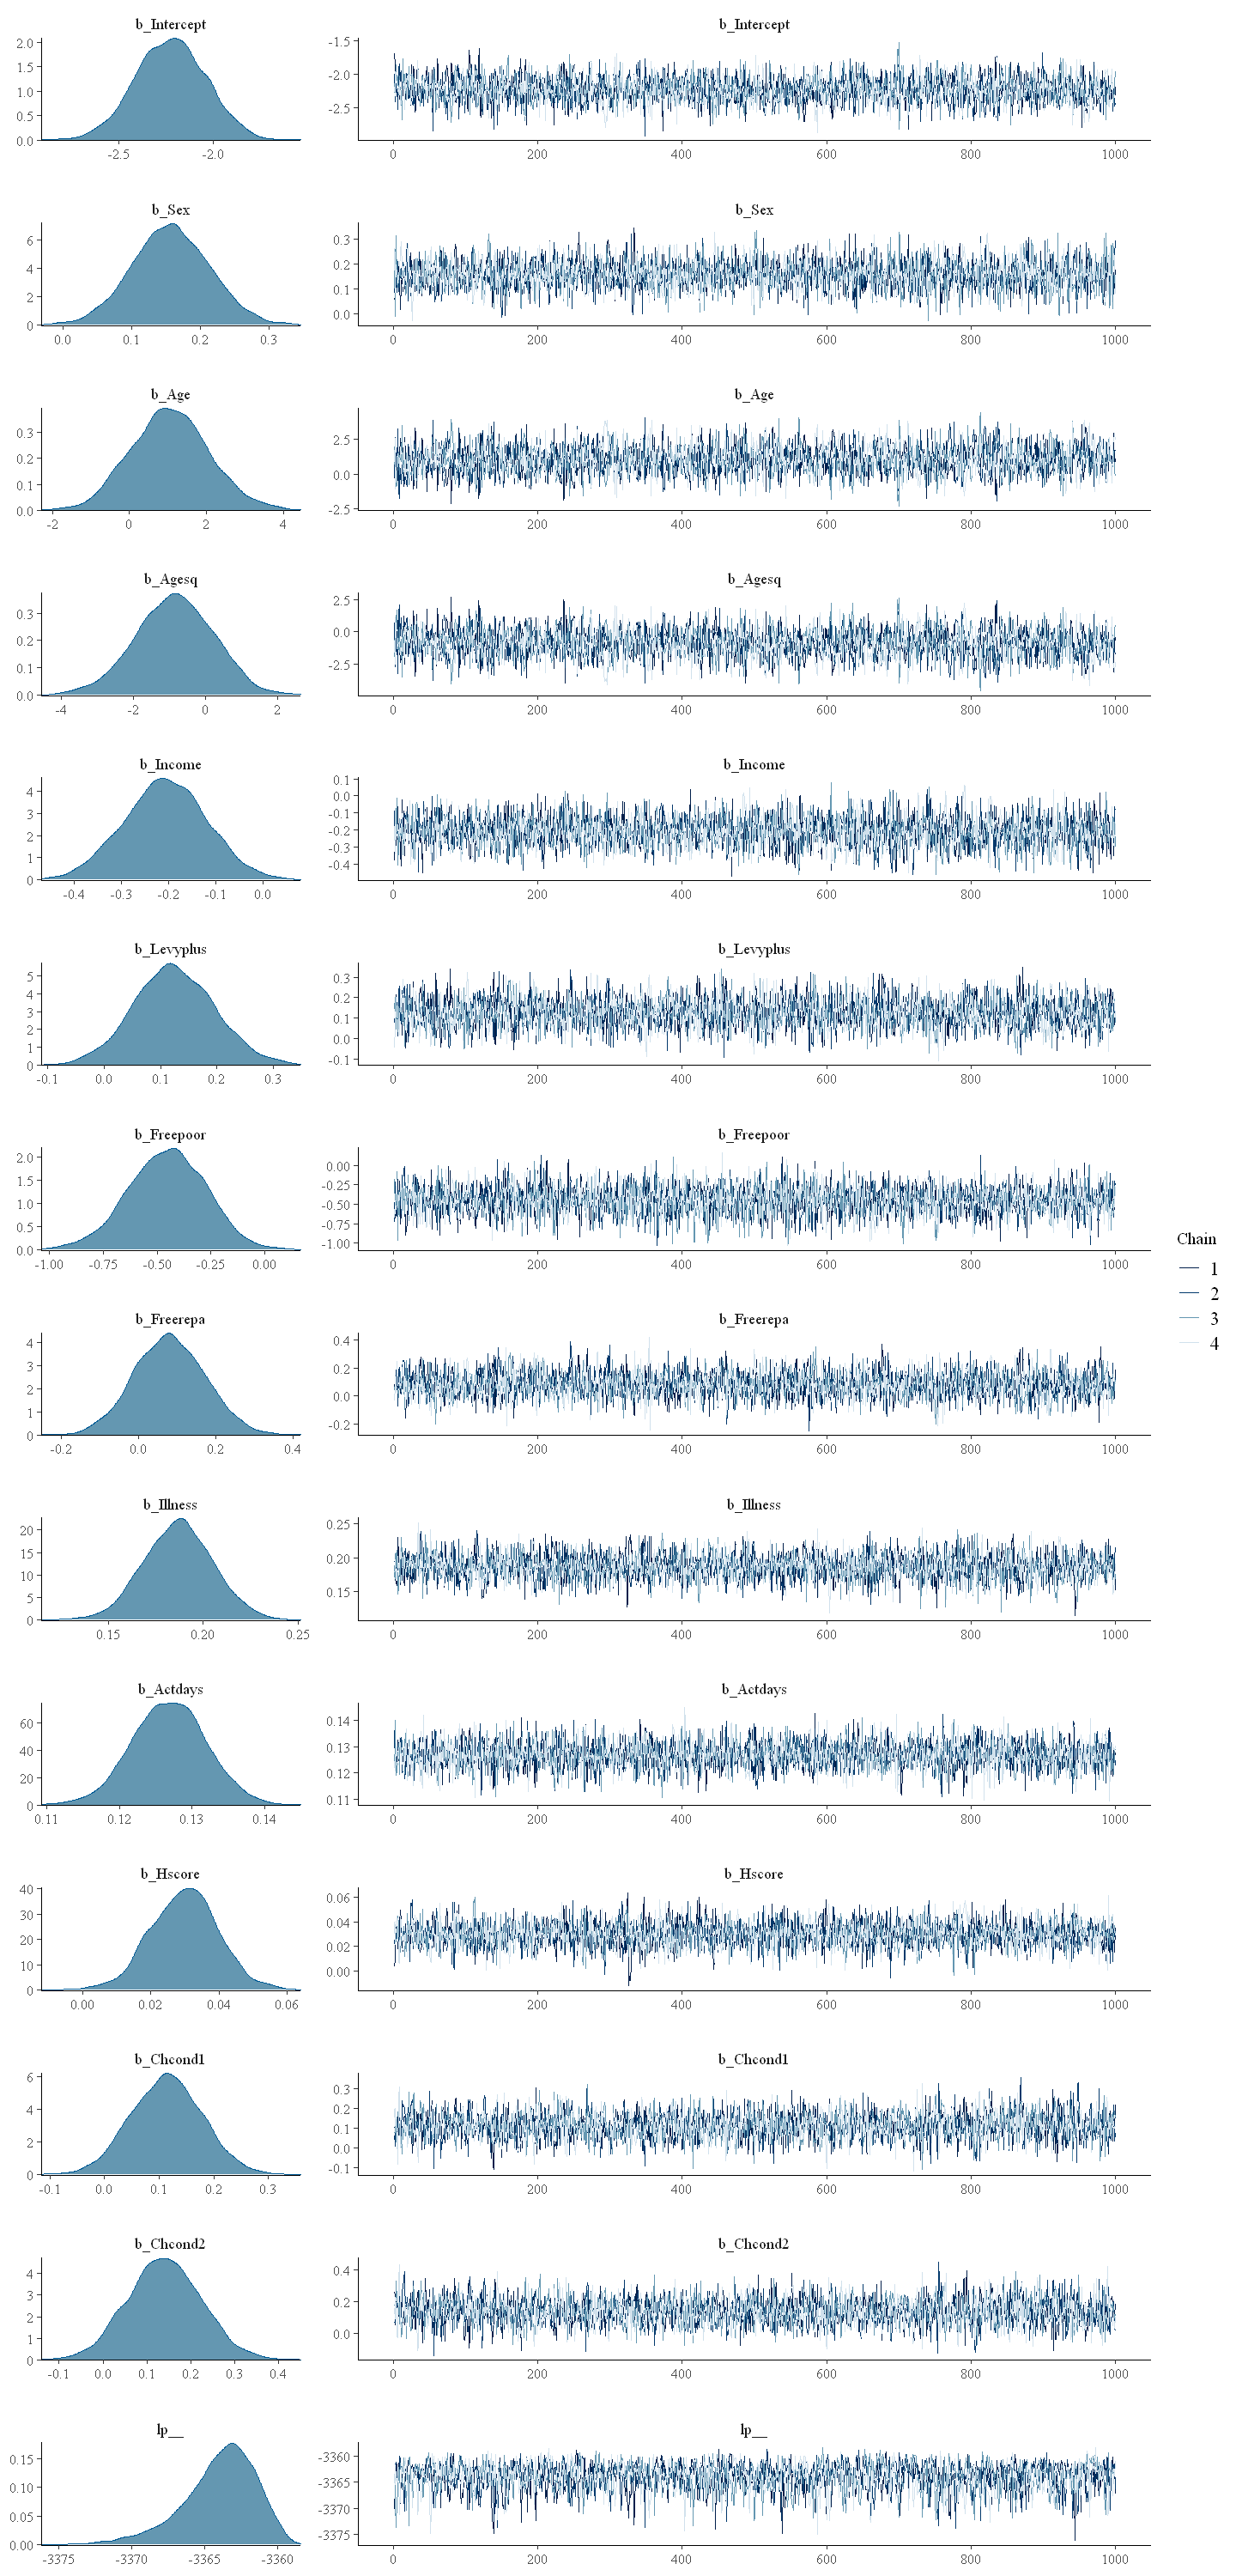

In [24]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.brms.01,widths=c(1,3))

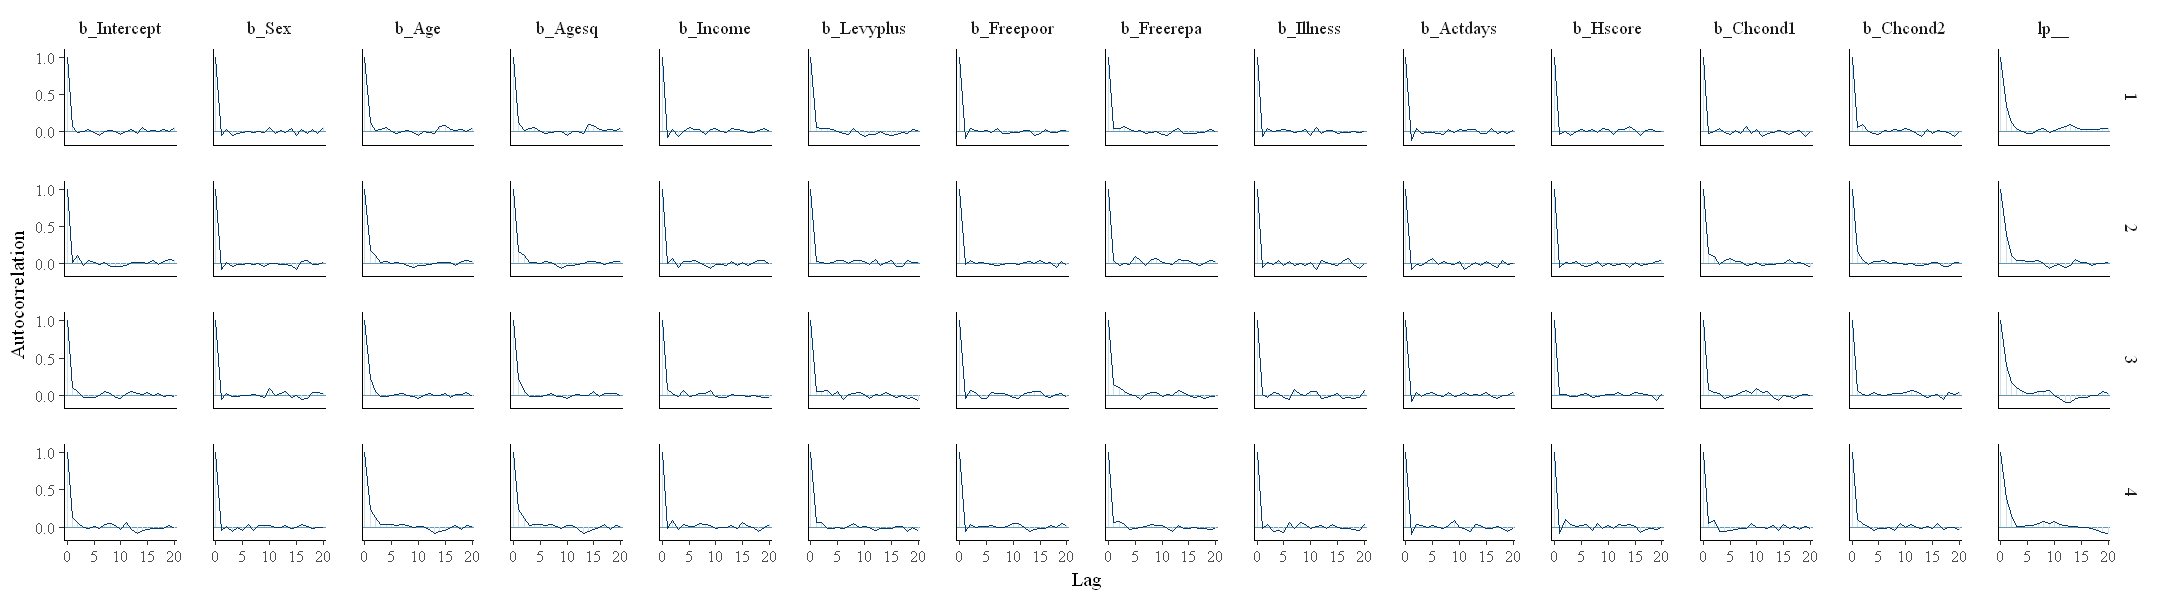

In [25]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.brms.01)

# 09 - Negative binomial regression with `brms`

In [26]:
Docvis.brms.NB01<-brm(Dvisits~.,data=Docvis,family=negbinomial)

Compiling Stan program...

Start sampling



In [27]:
summary(Docvis.brms.NB01,digits=2)

 Family: negbinomial 
  Links: mu = log; shape = identity 
Formula: Dvisits ~ Sex + Age + Agesq + Income + Levyplus + Freepoor + Freerepa + Illness + Actdays + Hscore + Chcond1 + Chcond2 
   Data: Docvis (Number of observations: 5190) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -2.21      0.23    -2.66    -1.75 1.00     2878     2419
Sex           0.22      0.07     0.08     0.36 1.00     3807     2858
Age          -0.16      1.25    -2.63     2.35 1.00     2225     2178
Agesq         0.55      1.38    -2.24     3.26 1.00     2253     2264
Income       -0.14      0.11    -0.36     0.07 1.00     3688     3081
Levyplus      0.12      0.09    -0.05     0.29 1.00     3428     3162
Freepoor     -0.51      0.21    -0.95    -0.11 1.00     4217     2851
Freerepa      0.15      0.12    -0.08     0.37 1.00     3355     30

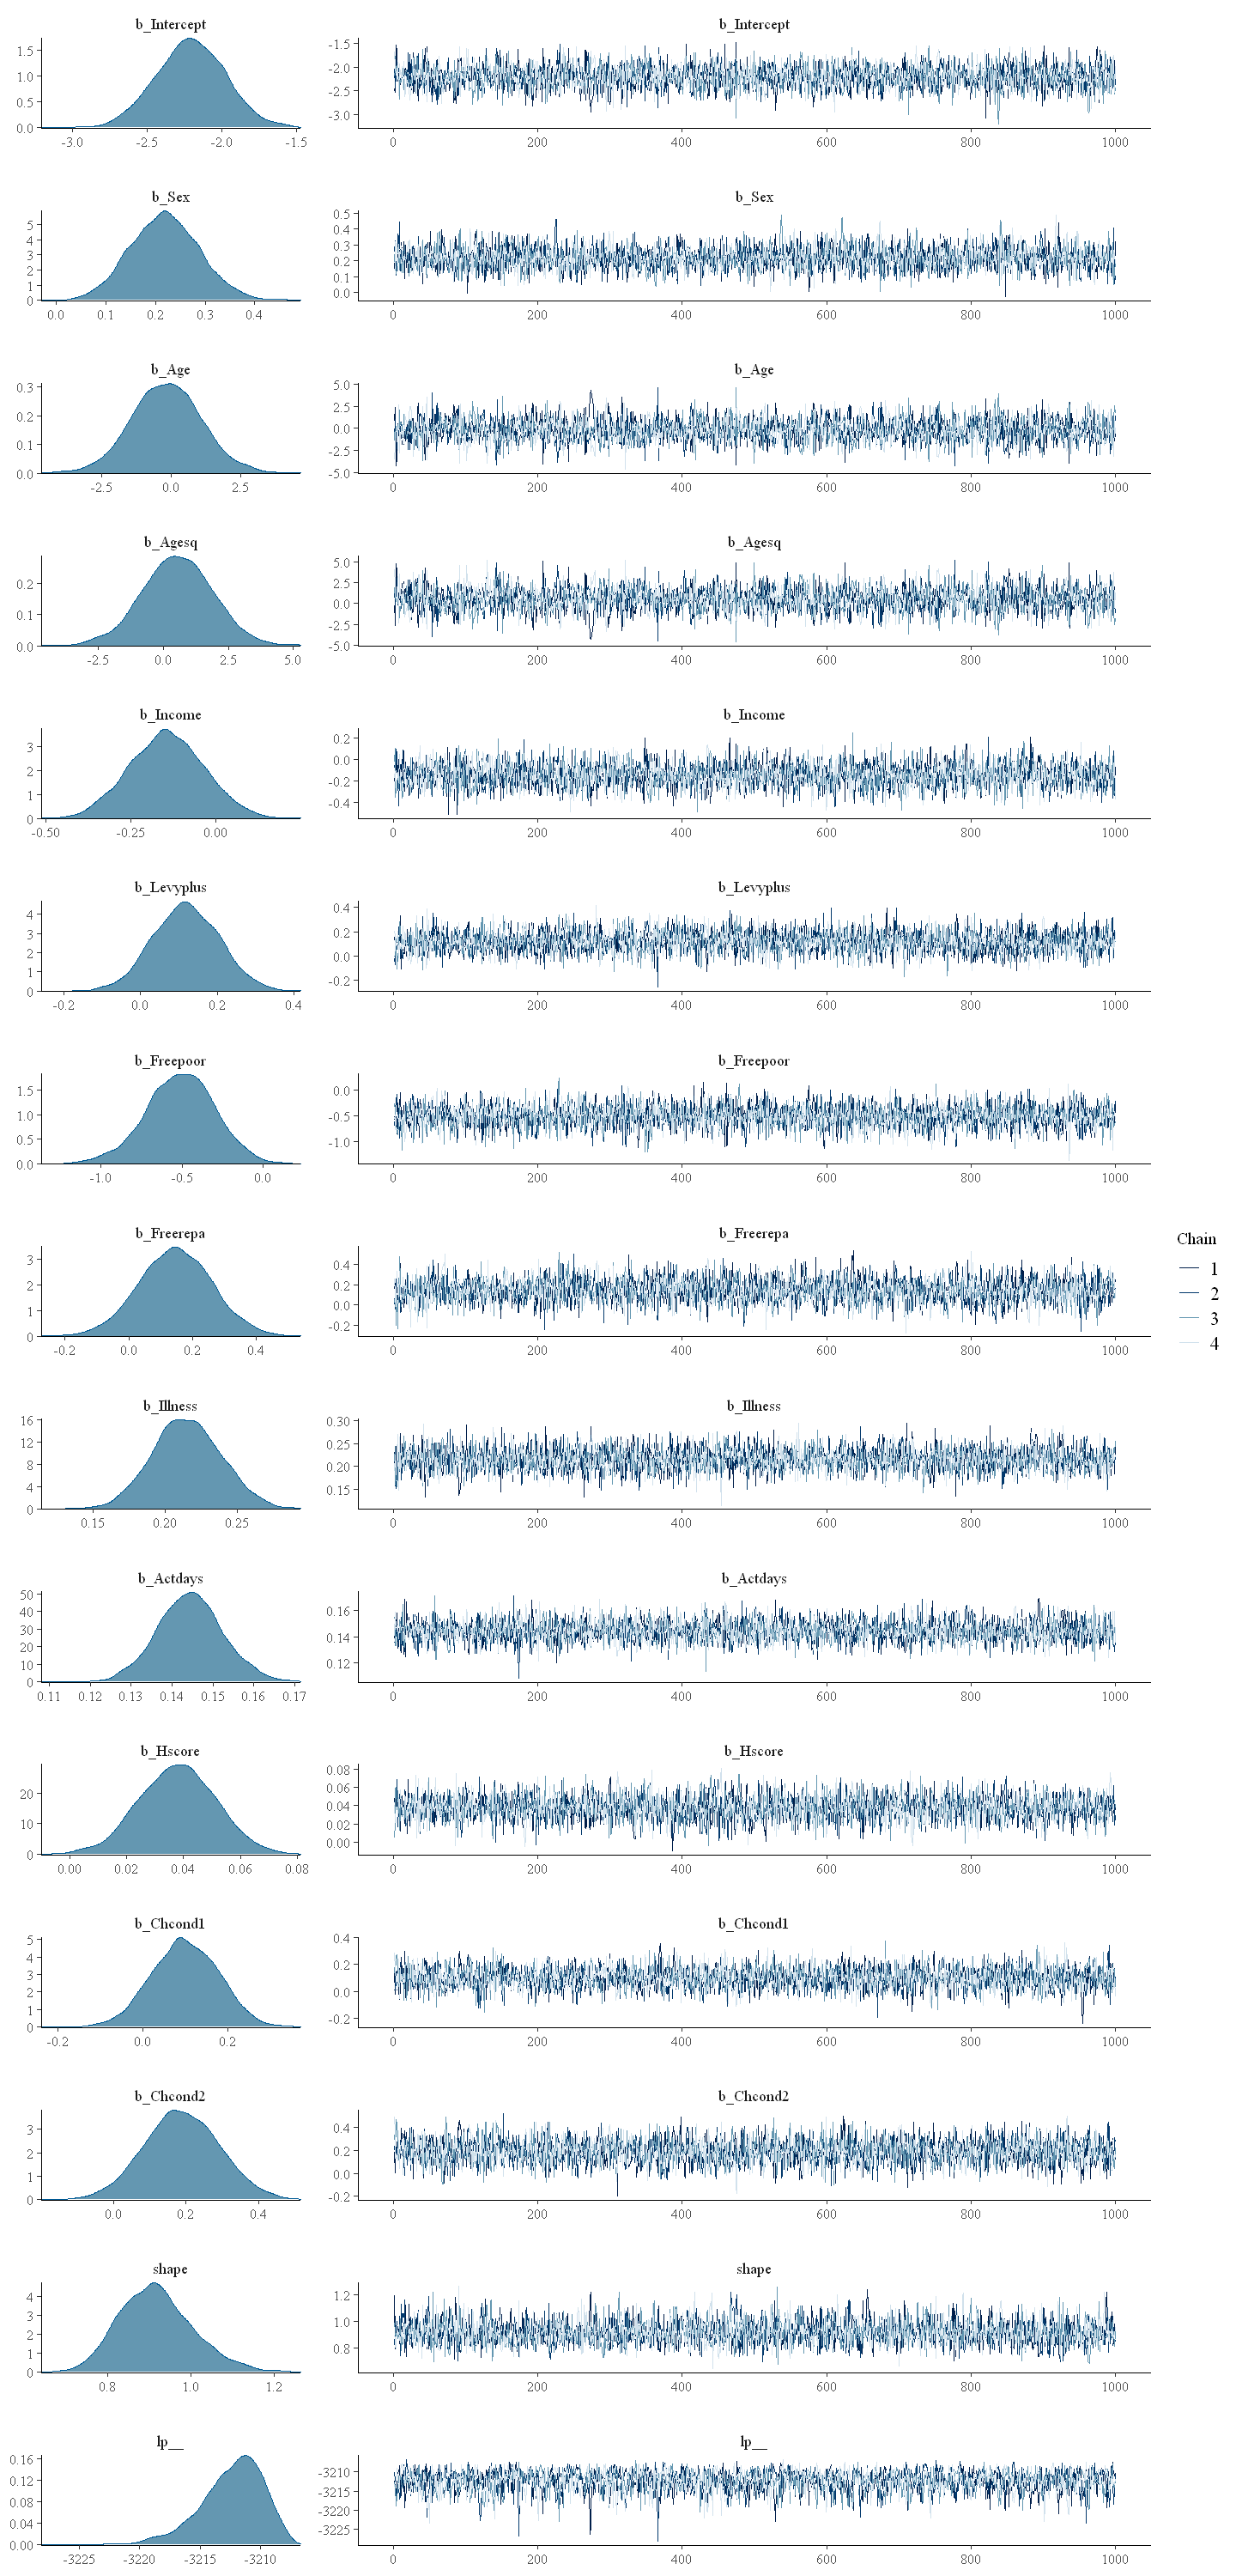

In [28]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.brms.NB01,widths=c(1,3))

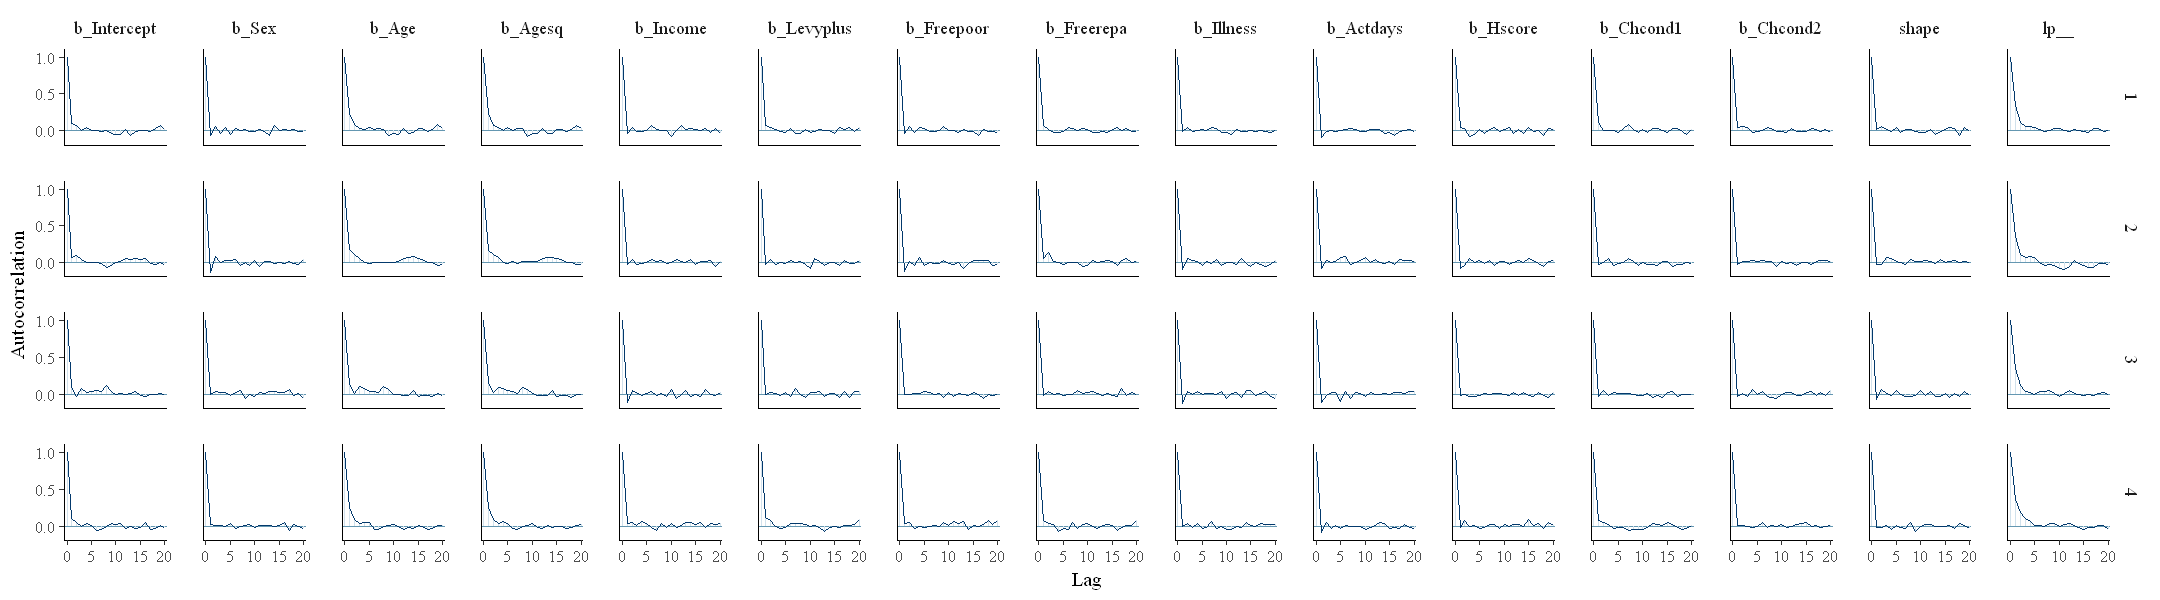

In [29]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.brms.NB01)